# Series de Fourier

<div class="alert alert-block alert-warning">
Este notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, <a href="http://https://www.ing.uc.cl/electrica/">Departamento de Ingeniería Eléctrica</a>, <a href="http://www.uc.cl">Pontificia Universidad Católica de Chile</a>.<br> Profesor: <a href="http://www.rodrigocadiz.com">Rodrigo F. Cádiz</a><br>
Consultas y comentarios: <a href="mailto:rcadiz@ing.puc.cl">rcadiz@ing.puc.cl</a>

</div>

***

## Motivación

La idea fundamental detrás de las [Series de Fourier](https://en.wikipedia.org/wiki/Fourier_series) es poder descomponer una señal en componentes más simples, tanto para analizar señales como para sintetizarlas. Hay varios conceptos e ideas importantes detrás de este tipo de herrienta, que discutimos brevemente a continuación.

### Análisis
Descomponer una señal en partes constituyentes lo más simples posible.


### Síntesis
Ensamblar una señal desde sus partes constituyentes.


### Sistemas lineales
En muchos casos estas operaciones de análisis y síntesis se hacen mediante operdores lineales, tales como integrales y series, tal como sucede con las Series y Transformadas de Fourier. Por eso se conoce al análisis de Fourier como el estudio de los sistemas lineales.

### Sistemas repetitivos o simétricos
En matemáticas e ingeniería usualmente se encuentran patrones repetivivos regulares, que son períodicos en el tiempo, como el movimiento armónico o en el espacio, como una cantidad física distribuída sobre una región del espacio que exhibe simetría. De hecho, la distribución espacial del calor en un anillo es lo que motivó originalmente a Fourier a formular su teoría. Esto sugiere estudiar en detalle el comportamiento de señales periódicas.

La periodicidad en el tiempo se estudia mediante la frecuencia, el número de repeticiones en una unidad temporal.La periodicidad en el espacio se estudia típicamente mediante el período, que tan grande es un patrón que se repite.

### ¿Por qué señales periódicas?
La idea de usar señales periódicas tiene que ver con utilizar funciones simples, como los senos o cosenos para modelar señales más complicadas. Dado que las funciones sinusoidales son periódicas, resulta natural primero considerar el caso de señales periódicas. Otra razón para esto es que en muchas aplicaciones prácticas, nos interesa concentrarnos en un intervalo acotado de una señal, y no nos interesa como sea la señal fuera de ese intervalo. Si tenemos herramientas útiles para analizar señales periódicas, y consideramos su período como el intervalo de interés, podemos utilizar estas herramientas para entender el comportamiento de la señal en ese intervalo.

Pero estas funciones sinusoidales son infinitas y periódicas. Surge entonces la necesidad de expresar una función periódica arbitraria como una suma de senos y cosenos. Entonces surge la pregunta:

¿Es posible descomponer una función periódica arbitraria $f:\mathbb{R}\rightarrow\mathbb{C}$, de período $T$, de la siguiente forma?

$$ f(t) = \sum_{n} a_n \cos (2 \pi n \frac{t}{T}) + \sum_{n} b_n \sin (2 \pi n \frac{t}{T}) $$

**Claramente esta respuesta es no, si se consideran sumas finitas**. No hay razón por la cual una función periódica arbitraria sea siempre posible de descomponer en una suma finita de sinusoides.

<div class="alert alert-block alert-info">
<font color="red">Sin embargo, Joseph Fourier propuso, en 1807, que la respuesta a esta pregunta es sí, en el caso que se permitan suman <i>infinitas</i>, como veremos más adelante.</font>
</div>

### Formulación compleja

Utilizando la igualdad de Euler, esta misma idea se puede expresar como

$$ f(t) = \sum_n c_n e^{i 2 \pi n t/T} $$ 

con $n \in \mathbb{Z}$ y $c_n \in \mathbb{C}$. 

Es importante destacar que $c_n$, al ser un número complejo, satisface 

$$ c_{-n} = \overline{c_{n}} $$

donde $\overline{c_{n}}$ es el conjugado, lo que se conoce como simetría conjugada. La simetría conjugada es muy importante en el caso que $f(t)$ sea una función real. En el caso $c_0$, se cumple que $ c_{0} = \overline{c_{0}} $, lo que implica que $c_0$ es un número real. 

Para cualquier $n \neq 0$ se tiene que 

$$ |c_{-n}| = |{c_{-n}}| $$



### ¿Cómo encontrar los coeficientes?

Supongamos, primero que la idea de descomponer $f(t)$ en sumas de sinusoides es válida. ¿Cómo podríamos encontrar los coeficientes $c_n$? Consideremos primero una suma finita:

$$ f(t) = \sum_{n=-N}^{N} c_n e^{i 2 \pi n t/T} $$

Intentemos encontrar el coeficiente para $n=k$, con $k$ fijo. Podemos aislar este componente multiplicando a ambos lados por $e^{-i 2 \pi k t/T}$:

$$ e^{-i 2 \pi k t/T} f(t) = e^{-i 2 \pi k t/T} \sum_{n=-N}^{N} c_n e^{i 2 \pi n t/T} = \cdots + e^{-i 2 \pi k t/T} c_k e^{i 2 \pi k t/T} + \cdots $$

entonces podemos aislar $c_k$, mediante la siguiente expresión

$$ c_k = e^{-i 2\pi k t/T}f(t) -  \sum_{n=-N,n \neq k}^{N} c_n e^{-i 2 \pi k t/T} e^{i 2 \pi n t/T} = e^{-i 2\pi k t/T}f(t) -  \sum_{n=-N,n \neq k}^{N} c_n e^{i 2 \pi (n-k) t/T} $$

Esto nos permite calcular $c_k$ en término de todos los otros coeficientes $c_n, n \neq k$. Necesitamos, de alguna forma, de encontrar una expresión para $c_k$ que no dependa de los otros coeficientes. La clave está en integrar ambos lados en un período $T$. Consideremos el caso $n \neq k$. Notamos que:

$$ \int_{0}^{T} e^{i 2 \pi (n-k) t/T} dt = \frac{T}{i 2 \pi (n-k)} e^{i 2 \pi (n-k) t/T} \biggr\rvert_{t=0}^{t=T} $$

$$ = \frac{T}{i 2 \pi (n-k)} \left( e^{i 2 \pi (n-k) T/T} -  e^{i 2 \pi (n-k) 0}\right) = \frac{T}{i 2 \pi (n-k)} \left( e^{i 2 \pi (n-k)} - 1 \right) $$


Dado que $e^{i 2 \pi q} = 1$ con $q \in \mathbb{Z}$, la expresión anterior se reduce a:

$$ =  \frac{T}{i 2 \pi (n-k)} \left( 1 - 1 \right) = 0 $$



Esto se debe a la propiedad de [ortogonalidad de las exponenciales complejas](./03-Funciones_importantes.ipynb#ortogonalidad_exponenciales_complejas) y la operación que hemos realizado formalmente se conoce como el producto interno entre dos funciones.

Este resultado nos permite encontrar una forma compacta de encontrar $c_k$. Integrando a ambos lados, entonces:

$$ \int_{0}^{T} c_k dt = c_k(T-0) =  c_k T  = \int_{0}^{T} e ^ {- i 2 \pi k t/T} f(t) dt = \frac{1}{T}(e^{i 2 \pi k t/T}|f )$$

por lo que


$$ \color{blue}{\boxed{c_k  = \frac{1}{T}\int_{0}^{T} e ^ {- i 2 \pi k t/T} f(t) dt}} $$

Está claro que para una suma infinita, esta expresión para $c_n$ sigue siendo válida. Entonces, hemos encontrado una forma de encontrar los coeficientes $c_k$ de Fourier de una función $f(t)$ periódica de período $T$. 

***
## Series de Fourier: Definición

Por lo general, la Transformada de Fourier y la Serie de Fourier se definen para funciones integrables (o cuadrado integrables) y periódicas, respectivamente. Como ninguna función periódica pertenece a $L^1$ o $ L^2$, la Transformada de Fourier y la Serie de Fourier aparecen como dos teorías separadas. Sin embargo, ambas teorías se fusionan en el marco general de las [distribuciones](./06-Distribuciones.ipynb).

### Series de Fourier para funciones periódicas
Sea $f: \mathbb{R} \mapsto \mathbb{C}$ una función periódica de período $T$ para todo $t \in \mathbb{R}$. Definimos los espacios vectoriales $L^1_T$ y $L^2_T$ para funciones de período $T$ que son integrables y cuadrado-integrables sobre $[0,T]$, respectivamente. Nótese que $L^2_T \subset L^1_T$. En $L^2_T$, podemos definir el producto interno como:

$$ ( f , g ) = \frac{1}{T}\int_{0}^{T} \overline{f(t)} g(t) dt  =  \frac{1}{T}\int_{a}^{a+T} \overline{f(t)} g(t) dt  \;\;\;\; \forall a \in \mathbb{R} $$ 

y la norma como $\| f \|_{L^2_T} = \sqrt{( f|f)} = \frac{1}{\sqrt{T}}\left(\int_{0}^{T}f(t)dt  \right)^{1/2}$.

El teorema de las Series de Fourier en $L^2_T$ dice que toda $f \in L^2_T$ se puede descomponer de forma unívoca mediante la siguiente serie:


\begin{equation}
\color{blue}{
\boxed{
S_f(t)= \sum_{n \in \mathbb{Z}} c_n(f) e^{i 2 \pi n t/T}
\label{series_L2}}
}
\end{equation}

donde los coeficientes $c_n(f)$ están dados por:


\begin{equation}
\color{blue}{
\boxed{c_n(f)=(e^{i 2 \pi n t/T}|f )= \frac{1}{T}\int_{0}^{T} f(t)e^{-i 2 \pi n t/T} dt}
}
\end{equation}


<div class="alert alert-block alert-info">
Esta idea es muy poderosa. El hecho que una función periódica pueda descomponerse en una suma de funciones bases exponenciales complejas, cada una de ellas ponderada por el producto interno entre la función y cada una de las mismas bases, implica que las <b>bases de Fourier son ortonormales</b>.
</div>

La serie $S_f$ converge a $f$ en $L^2_T$, lo que significa:

$$  \lim_{M,N \rightarrow \infty} \left( \frac{1}{T}\int_{0}^{T} |  f- \sum_{n \in \mathbb{Z}} c_n(f) e^{i 2 \pi n  t}  |^2  \right) = 0  $$

***
### Identidad de Parseval
Esta expansión en serie cumple con la [identidad de Parseval o Bessel-Parseval](https://en.wikipedia.org/wiki/Parseval%27s_identity):

\begin{equation}
\|f\|_{L^2_T}^2=\frac{1}{T}\int_{0}^{T}|f(t)|^2 dt = \sum_{n \in \mathbb{Z}} |c_n(f)|^2
\end{equation}

<div class="alert alert-block alert-info">
Esta ecuación es muy importante. En algunos textos se conoce como la identidad de Rayleigh. Básicamente dice que la energía contenida en la señal, medida equivalente al "largo de la función" y al producto interno de la función consigo misma, es igual a la suma de los coeficientes de la Serie de Fourier al cuadrado.
</div>

Además, si $g \in L^2_{T}$:

$$ \sum_{n \in \mathbb{Z}} c_n(f) \overline{c_n(g)} =\frac{1}{T}\int_{0}^{T} f(t) \overline{g(t)} dt  $$

Reciprocamente, si los coeficientes $(\gamma_n)_{n \in \mathbb{Z}}$ son tales que 

$$\sum_{n \in\mathbb{Z}}|\gamma_n|^2 < \infty$$

la serie 

$$\sum_{n\in\mathbb{Z}} \gamma_k e^{i 2\pi n t/T} $$ 

converge en $L^2_T$ a la función $f \in L^2_T$ y $f$ es el único elemento de  $L^2_T$ tal que $c_n(f)=\gamma_n$.

Se tiene que:

$$ |c_k(f)|^2 \leq \frac{1}{T}\int_{0}^{T}|f(t)|dx = \frac{1}{T} \|f\|_{L^1_T}  \leq \sup_t f(t)  $$

La convergencia de la serie en $ L^2_T $ no implica que $ S_f(t)$ converja a $ f(t)$ para todos los valores de $t$. No significa que para cada valor de $t$, el número complejo $ f(t)$ sea igual a la suma de la serie de la derecha. Claramente, si $f$ se modifica en un solo punto o en cualquier conjunto de medida zero, la serie permanecerá sin cambios ya que los coeficientes de Fourier no se modifican. Más bien, la serie converge bajo la norma $L^2_T $ a $f$:

$$  \int_{0}^{T} | f - \sum_{n \in \mathbb{Z}}c_n(f)e^{i 2 \pi n t/T}  |^2 dt  =0 $$

Los coeficientes están bien definidos si $f \in L^1_T$. Esto implica que siempre es el caso para $f\in L^2_T \subset L^1_T$.

### Condiciones de Dirichlet

Dirichlet determinó las condiciones bajo las cuales una función $f(t)$ tiene una representación como una Serie de Fourier, las que son conocidas como las [condiciones de Dirichlet](https://en.wikipedia.org/wiki/Dirichlet_conditions). Estas son:

- $f$ debe ser absolutamente integrable sobre un período.
- $f$ debe ser de una variación acotada en cualquier intervalo acotado.
- $f$ debe tener un número finito de discontinuidades en cualquier intervarlo acotada y esas discontinuidades no deben ser infinitas.



### Convergencia en $L^2$

Si $f \in L^2_T$ y sus coeficientes de Fourier satisfacen 

$$\sum_{n \in \mathbb{Z}} |c_n(f)| < \infty $$

entonces $f$ es igual a una función contínua $g$ casi en todos lados y la Serie de Fourier de $f$ converge uniformemente a $g$ en $\mathbb{R}$. 


### Convergencia en $L^1$
Sea $f \in L^1_T$, sus coeficientes de Fourier verifican:

$$ |c_n(f)| \leq \frac{1}{T}\int_{0}^{T}|f(t)|dt  $$

y $c_n(f)$ decae a $0$ en $|n|\rightarrow \infty$

Observamos que la condición $f \in L^1_T$ es menos restrictiva que $f \in L^2_T$ y que los coeficientes de Fourier están bien definidos. 


Podría esperarse una convergencia en $L^1$ en casi todos los puntos para Series de Fourier para cualquier $f \in L^1_T$, pero esto no es correcto. ¡Se puede mostrar que existe una función $f \in L^1_T$ cuya Serie de Fourier diverge en todos los puntos! Este aparenemente catastrófico evento, se resuelve en el contexto de las distribuciones.

***
## Simetrías de los coeficientes

Dependiendo de las simetrías de $f(t)$, los coeficientes de Fourier exhiben las siguientes propiedades:

- $f$ real $\Leftrightarrow c_{-n} = \overline{c_{n}}, \hspace{0.5cm} n \in \mathbb{Z}$
- $f$ par $\Leftrightarrow c_{-n} = c_{n}, \hspace{0.5cm} n \in \mathbb{Z}$
- $f$ impar $\Leftrightarrow c_{-n} = -c_{n}, \hspace{0.5cm} n \in \mathbb{Z}$
- $f$ real y par $\Leftrightarrow$ la secuencia $c_{n}$ es real y par, $\hspace{0.5cm} n \in \mathbb{Z}$
- $f$ real e impar $\Leftrightarrow$ la secuencia $c_{n}$ es imaginaria e impar, $\hspace{0.5cm} n \in \mathbb{Z}$

Estas propiedades deben interpretarse en el sentido de las convergencias de las Series de Fourier. Por ejemplo, las dos funciones $f(t)$ y $f(-t)$ tienen la misma expansión en Series de Fourier, y por lo tanto cumplen con $ c_{-n} = c_{n}$ si son igual casi en todos los lugares de $t$.


***
## Armónicos y frecuencias

Hasta ahora hemos utilizado $T$, el período, una descripción más bien geométrica, en vez del término más físico, *frecuencia*. Analizando la definición de la Serie de Fourier, es claro que, si bien se necesitan infinitas sinusoides para representar una señal periódica, cada una de una frecuencia en particular, no son necesarias todas las frecuencias, si no solo algunas. Estas frecuencias están relacionadas con el período de la señal.

Dado un período $T$, la frecuencia fundamental es 

$$ f_0 = \frac{1}{T} $$

En muchas formulaciones de las Series y Transformadas de Fourier se utiliza la variable

$$ \omega_0 = 2 \pi f_0 = \frac{2\pi}{T} $$

que representa la frecuencia fundamental en radianes.

Dada una señal periódica, vemos que las frecuencias contenidas en su expansión en Series de Fourier son:

$$ \frac{n}{T} = n f_0 = \frac{n \omega_0}{2\pi}, \mbox{ con } n = 0, 1, 2, \dots$$

Como todas estas frecuencias son múltiplos enteros de la frecuencia fundamental, se denominan [armónicos](https://en.wikipedia.org/wiki/Harmonic).


***
## Forma trigonométrica
A veces es conveniente escribir:

\begin{equation}
f(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos (2\pi n \frac{t}{T}) + b_n \sin (2\pi n \frac{t}{T})
\end{equation}

donde $a_0 = 2c_0$ y

$$ a_n= c_n + c_{-n} = \frac{2}{T}\int_{0}^{T}f(t)\cos (2\pi n t/T)  dt,  \;\;\; b_n= i(c_n-c_{-n}) = \frac{2}{T}\int_{0}^{T}f(t) \sin (2\pi n t/T) dt $$

Esta forma es especialmente útil cuando $f$ es real (dado $a_n$ y $b_n$ son reales) o si $f$ tiene ciertas propiedaes de simetría (entonces se obtiene una serie de senos o cosenos). Con esta notación, la identidad de Parseval se escribe:

$$ \|f\|_{L^2_T}^2=\frac{1}{T}\int_{0}^{T}|f(t)|^2 dt = \frac{1}{4}|a_0|^2  + \sum_{n=1}^{\infty} \frac{(|a_n|^2+|b_n|^2)}{2} $$.

## Forma de laboratorio

Otra representación muy utilizada en las Series de Fourier es la llamada forma de laboratorio.

\begin{equation}
f(t) = A_0 + \sum_{n=1}^{\infty} A_n \cos (2\pi n \frac{t}{T} + \phi_n)
\end{equation}

donde los coeficientes se relacionan con la forma trigonométrica mediante las identidades:

$$ A_k = \sqrt{a_k^2 + b_k^2} \hspace{1cm} \tan({\phi_k}) = \frac{-b_k}{a_k} $$


***
## Ejemplo:

Consideremos una función periódica, de período $2L$, que representa un pulso periódico de ancho $L$, el cual puede escribirse, en el rango $[0,2L]$ como:

$$f(t) = 2[(\mbox{|‾}(\frac{x}{L}) - \mbox{|‾}(\frac{x}{L} - 1)] - 1$$

donde $\mbox{|‾}(t)$ es la función escalón, tal como lo muestra la figura siguiente. Esta función representa una onda cuadrada, una función muy utilizada en muchas áreas de la ingeniería.


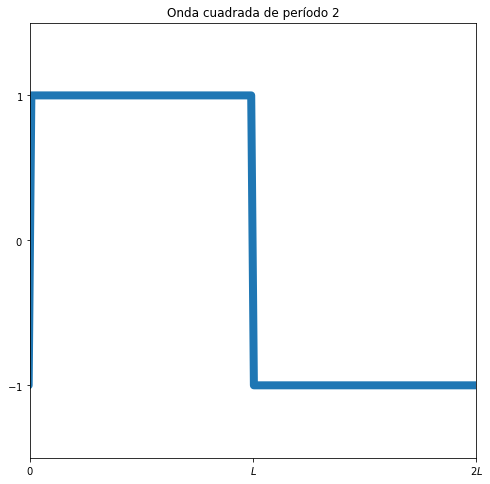

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

points = 1000
t = np.linspace(0,1,points)

L = 1  # L: mitad del período

t = np.linspace(-6, 6, 1000) 
escalon = lambda t: (t>0).astype("float64")
pulso = 2*(escalon(t/L)-escalon(t/L -1)) - 1

plt.figure(figsize=(8,8))
plt.xlim(0,2*L)
plt.ylim(-1.5,1.5)
plt.xticks([0,1,2],['$0$','$L$','$2L$'])
plt.yticks([-1,0,1],['$-1$','$0$','$1$'])
plt.title("Onda cuadrada de período %d" %(2*L))
plt.plot(t,pulso,linewidth=8) 

plt.show()

Ahora, expandamos esta función en su Serie de Fourier. Sabemos que tiene simetría real e impar, por lo que sus coeficientes $a_0 = a_n = 0$. Esto es bastante evidente si miramos bien el gráfico de la función. Como es impar, sólo nos servirán senos y no cosenos. Por lo tanto esperamos que sólo los coeficientes de la expansión seno nos sirvan, si agregamos cosenos a la suma, sólo estropearán la simetría.

Entonces,

$$ b_n = \frac{1}{L} \int_{0}^{2L} f(x) \sin( 2\pi n \frac{x}{2L}) dx = \frac{1}{L} \int_{0}^{L} \sin( \pi n \frac{x}{L}) dx - \frac{1}{L} \int_{L}^{2L} \sin( \pi n \frac{x}{L}) dx $$

$$ b_n = \frac{1}{L} \int_{0}^{L} \sin( \pi n \frac{x}{L}) dx + \frac{1}{L} \int_{0}^{L} \sin( \pi n \frac{x}{L}) dx $$

$$ b_n = \frac{2}{L} \int_{0}^{L} \sin( \pi n \frac{x}{L}) dx = \frac{4}{n \pi} \sin^2(\frac{n \pi}{2}) = \frac{2}{n\pi} [1 - (-1)^n ] $$

con lo que:

$$ b_n = \frac{4}{n \pi} \times \begin{cases} 0 & n \mbox{ par} \\ 1 & n \mbox{ impar} \end{cases} $$

Luego, podemos expandir la función $f(t)$ como:

$$ \boxed{f(t) = \frac{4}{\pi} \sum_{n=1,3,5,\dots}^{\infty} \frac{1}{n} \sin \left(\frac{n \pi t}{L}\right)} $$

Obviamente, en un computador no es posible calcular numéricamente una suma infinita. Veamos que tan buena es esta expansión para un número finito de términos.

[ 1  3  5  7  9 11 13 15 17 19]


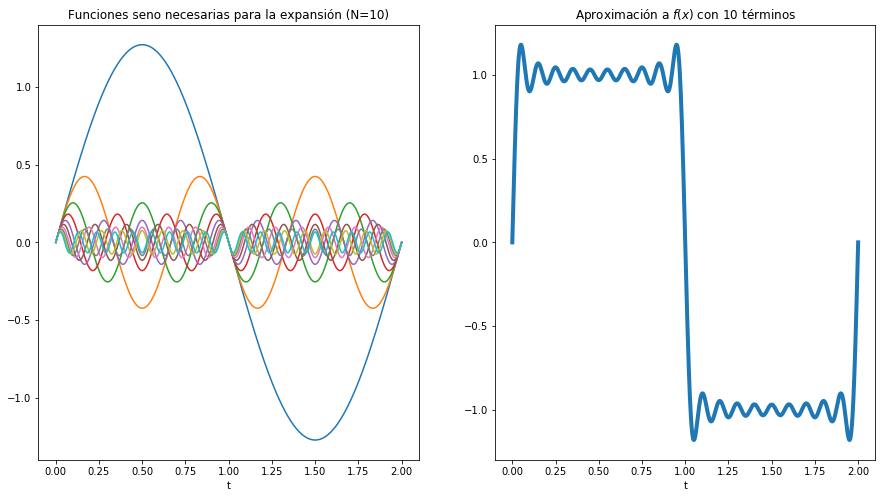

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 10 # Número de términos 
L = 1

odds = np.arange(1, 2*n, 2)
print(odds)
points = 1000
x = np.linspace(0,2,points)
fx = np.zeros(points)
bn = np.zeros(2*n)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1) 

for odd in odds:

    y = (4/(np.pi*odd))*np.sin(odd*np.pi*x/L) 
    bn[odd] = 4/(np.pi*odd)
    fx = fx + (4/(np.pi*odd))*np.sin(odd*np.pi*x/L)
    plt.plot(x, y)
    plt.xlabel("t")
    plt.title("Funciones seno necesarias para la expansión (N=%d)" %(n))
 

plt.subplot(1,2,2)
plt.plot(x, fx, linewidth=4)
plt.xlabel("t")
plt.title("Aproximación a $f(x)$ con %d términos" %(n))
    
plt.show()

Como se observa en la figura, vemos que a medida que agregamos términos, la aproximación mejora. Sin embargo, para un número finito de términos, la Serie de Fourier no converge de la misma manera para todos los puntos, es decir, no hay [convergencia uniforme](./05-Funciones_espacios_y_convergencia.ipynb#convergencia). Cada punto en particular oscila en torno al punto de convergencia a medida que $N \rightarrow \infty$. Dicho en otras palabras, no todos los puntos convergen a la misma velocidad. Esto se conoce como el [fenómeno de Gibbs](https://en.wikipedia.org/wiki/Gibbs_phenomenon). Estas oscilaciones nunca desaparecen, salvo en el infinito. En las discontinuidades no hay convergencia punto a punto, pero sí converge a un límite, que no es el valor de la discontinuidad ese punto. 

Desde el punto de vista del análisis de señales, el fenómeno de Gibbs es la respuesta al escalón de un filtro pasabajos, y las oscilaciones se llaman artefactos. Esto sucede al truncar la Transformada de Fourier de una señal real, o la Serie de Fourier de una señal periódica. Esto se puede representar como una convolución de la señal original con la respuesta al impulso del filtro, que en este caso es una función sinc. Por lo tanto, el fenómeno de Gibbs puede verse como el resultado de una función escalón (si no se requiere periodicidad) o una onda cuadrada (si es periódica) convolucionada con una función sinc: las oscilaciones en la función sinc causan estas perturbaciones oscilatorias en la salida.

***
### Espectro de potencia o energía o de frecuencias

Una representación muy utilizada de la información contenida en una Serie de Fourier es mediante lo que se conoce como [espectro de frecuencias](https://en.wikipedia.org/wiki/Spectral_density#Power_spectral_density). Dicho en otras palabras, es una representación gráfica del [dominio de la frecuencia](https://en.wikipedia.org/wiki/Frequency_domain). Consiste básicamente en graficar cada componente sinusoidal en términos de su frecuencia relativa, en el eje x y el módulo de la amplitud al cuadrado de cada coeficiente de Fourier $c_k$ en el eje y. Este es porque, en general, los coeficientes $c_k$ son números complejos y ademas el término $|c_k|^2$ representa la energía contenida en cada armónico. Cuando se grafica de esta forma se conoce como el espectro de potencias o de energía. Claramente, cuando se grafica la magnitud de cada coeficiente complejo, la representación visual no está completa, faltaría graficar las fases. 

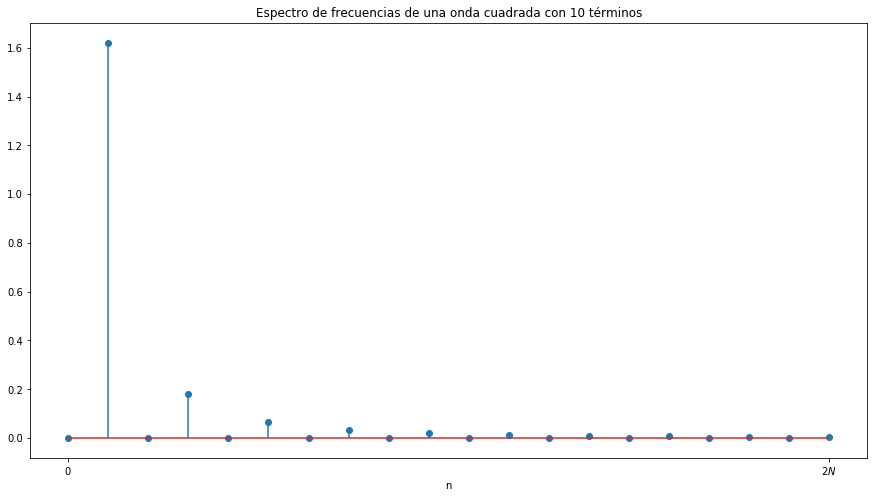

In [17]:
index = np.linspace(0,bn.shape[0]-1,bn.shape[0])
plt.figure(figsize=(15,8))
plt.stem(index,np.power(np.abs(bn),2),use_line_collection=True)
plt.xlabel("n")
plt.xticks([0,2*n-1],['$0$','$2N$'])
plt.title("Espectro de frecuencias de una onda cuadrada con %d términos" %(n))
plt.show()

La siguiente animación muestra como la representación temporal o espacial y el espectro de frecuencias, si bien son representaciones visuales distintas, provienen y contienen la misma información respecto a la señal.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/72/Fourier_transform_time_and_frequency_domains_%28small%29.gif" width="500"/>

(tomada de https://en.wikipedia.org/wiki/Frequency_domain)

### Relación entre los coeficientes

Los coeficientes de la formulación compleja están relacionados con la formulación trigonométrica de acuerdo a las siguiente relación


$$ c_n = \frac{a_n  - i b_n}{2} $$

A continuación, se grafican los coeficientes complejos y trigonométricos para un pulso periódico.

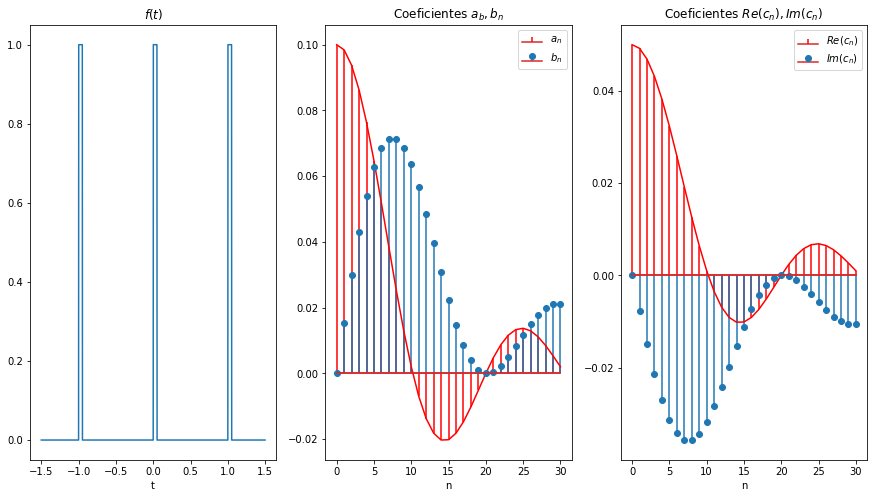

In [24]:
def fourierSeries_anbn(period, N):
    """Cálculo de los coeficientes an, bn up hasta el N-ésimo armónico"""
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        an = 2/T*(period * np.cos(2*np.pi*n*t/T)).sum()
        bn = 2/T*(period * np.sin(2*np.pi*n*t/T)).sum()
        result.append((an, bn))
    return np.array(result)

def fourierSeries_cn(period, N):
    """Cálculo de los coeficientes complejos cn up hasta el N-ésimo armónico"""
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        c_plusn = 1/T * (period * np.exp(-2j*np.pi*n*t/T)).sum()
        c_minusn = 1/T * (period * np.exp(2j*np.pi*n*t/T)).sum()
        result.append((c_plusn, c_minusn))
    return np.array(result)


# Definamos una función rectangular periódica
x = lambda t: (abs(t % 1)<0.05).astype(float)  

t = np.arange(-1.5, 1.5, 0.001)

plt.figure(figsize=(15,8))

plt.subplot(131) 
plt.plot(t, x(t))
plt.xlabel('t')
plt.title('$f(t)$')

t_period = np.arange(0, 1, 0.001)
period = x(t_period)
anbn = fourierSeries_anbn(period, 30)
cn = fourierSeries_cn(period, 30)

plt.subplot(132)
plt.stem(anbn[:,0], label='$a_n$',use_line_collection=True, linefmt='red', markerfmt='red')
plt.stem(anbn[:,1], label='$b_n$',use_line_collection=True)
plt.title("Coeficientes $a_b,b_n$")
plt.xlabel('n')
plt.legend()

plt.subplot(133)
plt.stem(cn[:,0].real, label='$Re(c_n)$',use_line_collection=True, linefmt='red', markerfmt='red')
plt.stem(cn[:,0].imag, label='$Im(c_n)$',use_line_collection=True)
plt.title("Coeficientes $Re(c_n),Im(c_n)$")
plt.xlabel('n')
plt.legend()

plt.show()

***
## Kernel de Dirichlet: ejemplo de una señal no convergente

Supongamos una señal de período 1 que tiene infinitos coeficientes de Fourier, todos con la misma amplitud 1. Es decir, podríamos escribir 

$$f(t) = \sum_{n=-\infty}^{\infty} e^{i 2 \pi n t} \mathbf{1} $$

Incluímos el término $\mathbf{1}$ para dejar expresado que todos los coeficientes son efectivamente $1$. Claramente, esta expresión para $f(t)$, si bien aparentemente es muy simple, no es una Serie de Fourier en ningún sentido. No representa una señal con energía finita y la serie no converge en $L^2$.  Sin embargo, veremos que mediante una aproximación, sí es posible representarla como una Serie de Fourier.

Supongamos que intentamos aproximar esta serie con una suma finita. Podríamos concebir una suma parcial de la forma

$$ D_N(t) = \sum_{n=-N}^{N} e^{i 2 \pi n t} $$

Aislando el término de frecuencia cero $n=0$ y combinando términos positivos y negativos, llegamos a

$$ D_N(t) = 1 + \sum_{n=1}^{N} \left( e^{i 2 \pi n t} + e^{-i 2 \pi n t}\right) = 1 + 2\sum_{n=1}^{N}\cos (2 \pi n t)$$ 

La función $D_N(t)$ se conoce como el [kernel de Dirichlet](https://en.wikipedia.org/wiki/Dirichlet_kernel) y también se conoce como la función [asinc](./03-Funciones_importantes.ipynb#dirichlet). En el siguiente código, graficamos esta función para distintos valores de $N$.

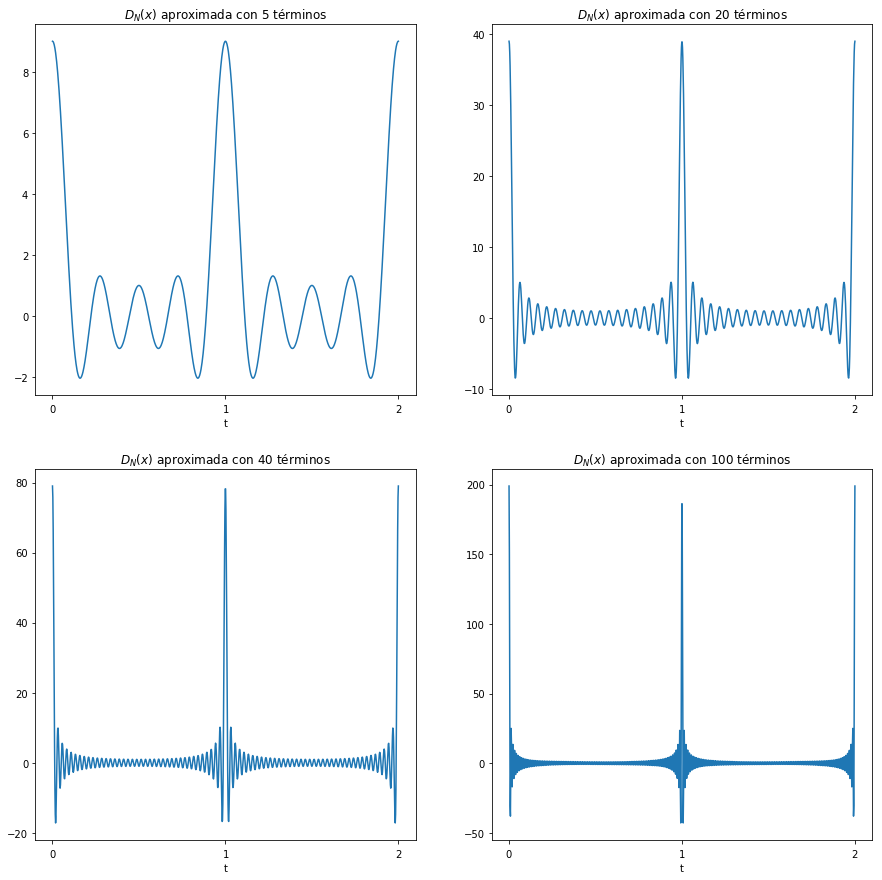

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(15,15))
plt.subplot(2,2,1)

n = 5 # Número de términos 

index = np.arange(1, n, 1)
points = 1000
x = np.linspace(0,2,points)
fx = np.ones(points)

for i in index:
    fx = fx + 2*np.cos(2*i*np.pi*x) 

plt.plot(x, fx)
plt.xlabel("t")
plt.xticks([0,1,2],['$0$','$1$','$2$'])
plt.title("$D_N(x)$ aproximada con %d términos" %(n))
    
plt.subplot(2,2,2)

n = 20 # Número de términos 

index = np.arange(1, n, 1)
points = 1000
x = np.linspace(0,2,points)
fx = np.ones(points)

for i in index:
    fx = fx + 2*np.cos(2*i*np.pi*x) 

plt.plot(x, fx)
plt.xlabel("t")
plt.xticks([0,1,2],['$0$','$1$','$2$'])
plt.title("$D_N(x)$ aproximada con %d términos" %(n))

plt.subplot(2,2,3)

n = 40 # Número de términos 

index = np.arange(1, n, 1)
points = 1000
x = np.linspace(0,2,points)
fx = np.ones(points)

for i in index:
    fx = fx + 2*np.cos(2*i*np.pi*x) 

plt.plot(x, fx)
plt.xlabel("t")
plt.xticks([0,1,2],['$0$','$1$','$2$'])
plt.title("$D_N(x)$ aproximada con %d términos" %(n))

plt.subplot(2,2,4)

n = 100 # Número de términos 

index = np.arange(1, n, 1)
points = 1000
x = np.linspace(0,2,points)
fx = np.ones(points)

for i in index:
    fx = fx + 2*np.cos(2*i*np.pi*x) 

plt.plot(x, fx)
plt.xlabel("t")
plt.xticks([0,1,2],['$0$','$1$','$2$'])
plt.title("$D_N(x)$ aproximada con %d términos" %(n))
    
    
plt.show()


Observamos que a medida que $N\rightarrow\infty$, 

$$ D_N(t) \rightarrow \sum_{n = -\infty}^{\infty} \delta_n = {\bot \!\! \bot \!\! \bot}_1$$ 

Esto nos da una primera intuición de como podría entenderse la Serie de Fourier en el contexto de señales que no son integrables o cuadrado-integrables. En este caso específico, da la impresión que la representación en Series de Fourier esta señal $f(t)$ es mediante una suma de impulsos, que claramente no son integrables.

En efecto, esto es así, efectivamente la representación en Series de Fourier de esta suma es un Shah. Este resultado se conoce como la [fórmula de suma de Poisson](https://en.wikipedia.org/wiki/Poisson_summation_formula):

\begin{equation}
\boxed{
\frac{1}{T}  \sum_{n=-\infty}^{+ \infty} e^{-i 2\pi \frac{n}{T}} \mathbf{1}  = \sum_{n=-\infty}^{+ \infty} \mathbf{\delta_{n T}} = {\bot \!\! \bot \!\! \bot}_T}
\end{equation}

Reconocemos aquí una descomposición en Series de Fourier de la [distribución Shah](./07-Impulso.ipynb#shah) de período $T$, tal como lo aproximamos anteriormente. 

Estoe tipo de resultados introduce la necesidad de definir la Serie de Fourier para señales que no están en $L^1$ o $L^2$, lo que se puede hacer mediante distribuciones.

<a name="distribuciones_periodicas"></a>
***
## Distribuciones periódicas


### El espacio de distribuciones periódicas de período $T$
Sea $\mathcal{P}_T$ el espacio de funciones $C^{\infty}$ que son periódicas de período $T$. Se define el espacio de distribuciones periódicas de período $T$ $\mathcal{P}'_T$ como:

$$  \mathcal{P}'_T := \left\{\mathbf{u}: \mathcal{P}_T \rightarrow  \mathbb{C}, \mathbf{u}\; \mbox{es lineal y contínua}    \right\} $$

y escribimos, para todo $\varphi \in \mathcal{P}'_T$, $\mathbf{u}(\varphi) = \langle \mathbf{u}, \varphi \rangle_T$

**Ejemplo:**

Si $f \in L^1_T$, se define una distribución periódica $\mathbf{f}$ por

$$\langle \mathbf{f}, \varphi \rangle_T = \int_{0}^{T}f(t) \varphi(t) dt \;\;\;\; \forall \varphi \in \mathcal{P}' $$ 


### Series de Fourier  en $\mathcal{P}'_T$
Si $\mathbf{u}$ es un distribución periódica de período $T$, sus coeficientes de Fourier se definen por:

$$ c_k(\mathbf{u}) = \frac{1}{T} \langle \mathbf{u}, e^{-ik\omega_0 t} \rangle_T \;\;\;\; k \in \mathbb{Z} $$

y se tiene que

$$ \mathbf{u} = \sum_{k\in\mathbb{Z}} c_k(\mathbf{u}) e^{ik\omega_0 t} $$

La convergencia de la serie significa:
$$ \lim_{N \rightarrow \infty} \biggr\langle \sum_{|k| \leq N} c_k(\mathbf{u}) e^{ik\omega_0 t} ,\varphi  \biggr\rangle_T = \langle \mathbf{u}, \varphi \rangle_T \;\;\;\; \forall \varphi \in \mathcal{P}_T $$

Sea $f\in L^1_T$ y $F$ la función periódica de período $T$ sobre $\mathbb{R}$ asociada con $f$. Para cada $\varphi \in \mathcal{S}(\mathbb{R};\mathbb{C})$ se puede construir una función de período $T$ $\Phi$ por 

$$  \Phi(t) = \sum_{k\in\mathbb{Z}} \varphi(t+kT) \;\;\;\; \in \mathcal{P}_T $$ 

y se tiene

$$ \int_{T} f(t) \Phi(t)dt = \int_{\mathbb{R}} F(t) \varphi(t) dt $$

En efecto, el término derecho es:

$$\int_{\mathbb{R}} F(t) \varphi(t) dt  = \sum_{k \in \mathbb{Z}} \int_{kT}^{(k+1)T}F(t) \varphi(t)dt = \sum_{k\in\mathbb{Z}}\int_{0}^{T} F(t)\varphi(t+kt)dt = \int_{0}^{T} F(t)\Phi(t)dt  $$

Para cada distribución periódica de período $T$ $\mathbf{u} \in \mathcal{P}'_T$ se puede asociar la distribución periódica de período $T$ sobre $\mathbb{R}$, $\mathbf{U} \in \mathcal{S'}(\mathbb{R};\mathbb{C})$ generalizando la identidad anterior:

$$  \langle \mathbf{U}, \varphi\rangle = \langle \mathbf{u}, \Phi\rangle_T $$

En efecto $\mathbf{U}$ es periódica en $T$ dado que reemplazando $\varphi$ por $\varphi(t+T)$ no cambia el valor de $\Phi(t)$. Por ejemplo, si if $\mathbf{u} = \mathbf{\delta}$ sobre $[-T/2,T/2]$, se tiene:

$$ \langle \mathbf{U},\varphi\rangle = \sum_{k\in\mathbb{Z}} \varphi(kT)= \sum_{k\in\mathbb{Z}}\mathbf{\delta_{kT}} = \mathbf{\mbox{|_|_|}_T} $$

Más generalmente,

$$ \langle \mathbf{U}, \varphi\rangle = \sum_{k \in \mathbb{Z}} \langle \mathbf{u}, \varphi (t+kT) \rangle_T = \sum_{k \in \mathbb{Z}} \langle \tau_{kT}\mathbf{u}, \varphi \rangle \;\;\; \forall \varphi \in \mathcal{S}(\mathbb{R};\mathbb{C})  $$  


$$ \mathbf{U}= \sum_{k \in \mathbb{Z}}  \tau_{kT}\mathbf{u} $$  

Recíprocamente, cada distribución períodica de período $T$ sobre $\mathbb{R}$ $\mathbf{U}$ se asocia con una única función $\mathbf{u} \in \mathcal{P}'_T$.

### Series de Fourier en $\mathcal{S}'$
Cada distribución períodica en $\mathbf{U}$ se puede escribir únicamente como una Serie de Fourier convergente 
en $\mathcal{S'}(\mathbb{R};\mathbb{C})$

\begin{equation}
\mathbf{U} = \sum_{n \in \mathbb{Z}}c_n(\mathbf{U})e^{i 2 \pi n t/T}
\end{equation}

y la serie $c_n(\mathbf{U})$ se incrementa lentamente. Los coeficientes de Fourier se pueden calcular mediante

\begin{equation}
c_n(\mathbf{U}) =\frac{1}{T}\langle \mathbf{u}, e^{-i 2 \pi n t/T}\rangle 
\end{equation}

escogiendo una distribución $\mathbf{u} \in \mathcal{P}'_T$  tal que $\mathbf{U} = \sum_{k\in\mathbb{Z}} \tau_{kT} \mathbf{u} $




<div class="alert alert-block alert-warning">
<b>Copyright</b><br>

Estos apuntes están licenciados bajo la licencia <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a>.<br>
Como citar: <i>Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.</i>
</div>